# CUSTOMER SEGMENTATION

In today's world the variation in type pf customer can be far and wide and as such customers are always seeking personalised services.As a result, businesses need to be able to segment their customer base into clusters and tailor an experience for each customer segment. This is an area where machine learning and data science are beginnning to make a difference in the industry by understanding the different variants of customers and helping businesses offer more personalised services. Creating customer segments can help us communicate targeted marketing messages with a particular segment, identify the best communication channel for a segment, establish stronger relationships with customers and identify which set of customers are most profitable.

In [58]:
#Import pandas
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
#Load in ecommerce data
df = pd.read_csv('ecommerce_data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,Email
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,Email
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email


In [60]:
#Check number of rows in dataset
len(df)

541909

In [61]:
#Check the number of unique customers in the dataset
len(df['CustomerID'].unique())

4373

In [62]:
#Calculate number of rows in data with null values
len(df) - len(df.dropna())

135080

In [63]:
#Check how many null values are present in every column
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
channel             0
dtype: int64


In [64]:
#Drop all null values
df = df.dropna()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,Email
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,Email
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email


In [65]:
#Check number of rows after dropping all null values
len(df)

406829

In [66]:
#Drop Invoice number and Stock code column since they have no direct role in analysis
df.drop(['InvoiceNo','StockCode'],axis=1,inplace=True)
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,Email
1,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,Email
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email


In [67]:
#write function to change description column from upper to lower case and remove punctuations
import re
def clean(Description):
    return re.sub(r'[^\w\s]','',Description).lower()

In [68]:
#Clean Description column 
df['Description'] = df['Description'].apply(clean)
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,white hanging heart tlight holder,6,12/1/10 8:26,2.55,17850.0,United Kingdom,Email
1,white metal lantern,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email
2,cream cupid hearts coat hanger,8,12/1/10 8:26,2.75,17850.0,United Kingdom,Email
3,knitted union flag hot water bottle,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email
4,red woolly hottie white heart,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email


In [69]:
#Reset index to re-arrange after dropping null values
df = df.reset_index().drop('index',axis=1)

In [70]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,white hanging heart tlight holder,6,12/1/10 8:26,2.55,17850.0,United Kingdom,Email
1,white metal lantern,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email
2,cream cupid hearts coat hanger,8,12/1/10 8:26,2.75,17850.0,United Kingdom,Email
3,knitted union flag hot water bottle,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email
4,red woolly hottie white heart,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email


In [71]:
#Calculate total amount spent by a customer on a product and put into new Column
df['Amount Total'] = df['UnitPrice'] * df['Quantity']
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel,Amount Total
0,white hanging heart tlight holder,6,12/1/10 8:26,2.55,17850.0,United Kingdom,Email,15.30
1,white metal lantern,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email,20.34
2,cream cupid hearts coat hanger,8,12/1/10 8:26,2.75,17850.0,United Kingdom,Email,22.00
3,knitted union flag hot water bottle,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email,20.34
4,red woolly hottie white heart,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email,20.34


In [72]:
#Create a vectorizer with English stopwords and apply to dataset
vectorizer = CountVectorizer(stop_words='english')
descriptions = vectorizer.fit_transform(df['Description'])
descriptions

<406829x2093 sparse matrix of type '<class 'numpy.int64'>'
	with 1640936 stored elements in Compressed Sparse Row format>

In [73]:
#Create 5 clusters for the different products sold
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(descriptions)

KMeans(n_clusters=5)

In [74]:
#Categorise products into the different clusters formed and create a new column Product with the cluster designation for each product
df['Product'] = kmeans.labels_
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel,Amount Total,Product
0,white hanging heart tlight holder,6,12/1/10 8:26,2.55,17850.0,United Kingdom,Email,15.30,2
1,white metal lantern,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email,20.34,2
2,cream cupid hearts coat hanger,8,12/1/10 8:26,2.75,17850.0,United Kingdom,Email,22.00,2
3,knitted union flag hot water bottle,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email,20.34,2
4,red woolly hottie white heart,6,12/1/10 8:26,3.39,17850.0,United Kingdom,Email,20.34,3


In order to better segment customers the dataset has to be transformed into one where each row represents a unique customer along with the product clusters to better associate customers to specific categories.

In [75]:
#Create a dataframe with rows representing unique customers
customers = pd.DataFrame({'CustomerID':df['CustomerID'].unique()})
customers.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [76]:
#Add columns of different product clusters
customers['Product0'] = 0
customers['Product1'] = 0
customers['Product2'] = 0
customers['Product3'] = 0
customers['Product4'] = 0
customers.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4
0,17850.0,0,0,0,0,0
1,13047.0,0,0,0,0,0
2,12583.0,0,0,0,0,0
3,13748.0,0,0,0,0,0
4,15100.0,0,0,0,0,0


In [77]:
#Create for each unique customer the total amount purchased in each product cluster
for index in tqdm(range(len(df))):
    customerID = df.loc[index,'CustomerID']
    product_category = df.loc[index,'Product']
    product_price = df.loc[index,'Amount Total']
    customers_table_index = customers[customers['CustomerID']==customerID].index[0]
    customers.loc[customers_table_index, 'Product'+str(product_category)] += product_price

100%|██████████| 406829/406829 [04:12<00:00, 1611.46it/s]


In [78]:
customers.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4
0,17850.0,0.0,321.30,4119.17,848.16,0.00
1,13047.0,0.0,518.38,2484.67,43.05,33.00
2,12583.0,84.7,1373.34,3943.64,1411.54,374.12
3,13748.0,0.0,52.08,896.17,0.00,0.00
4,15100.0,0.0,0.00,635.10,0.00,0.00


In [79]:
#create customer purchase history
customers['PurchaseCount'] = 0
customers['PurchaseMin'] = 0
customers['PurchaseMax'] = 0
customers['PurchaseMean'] = 0
customers['PurchaseSum'] = 0
customers.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum
0,17850.0,0.0,321.30,4119.17,848.16,0.00,0,0,0,0,0
1,13047.0,0.0,518.38,2484.67,43.05,33.00,0,0,0,0,0
2,12583.0,84.7,1373.34,3943.64,1411.54,374.12,0,0,0,0,0
3,13748.0,0.0,52.08,896.17,0.00,0.00,0,0,0,0,0
4,15100.0,0.0,0.00,635.10,0.00,0.00,0,0,0,0,0


In [80]:
from tqdm import tqdm
for index in tqdm(range(len(customers))):
    customerID = customers.loc[index,'CustomerID']
    history = df[df['CustomerID']==customerID]['Amount Total']
    customers.loc[index,'PurchaseCount'] = history.count()
    customers.loc[index,'PurchaseMin'] = history.min()
    customers.loc[index,'PurchaseMax'] = history.max()
    customers.loc[index,'PurchaseMean'] = history.mean()
    customers.loc[index,'PurchaseSum'] = history.sum()

100%|██████████| 4372/4372 [00:12<00:00, 357.89it/s]


In [81]:
customers.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum
0,17850.0,0.0,321.30,4119.17,848.16,0.00,312,-30.60,107.25,16.950737,5288.63
1,13047.0,0.0,518.38,2484.67,43.05,33.00,196,-15.00,68.00,15.709694,3079.10
2,12583.0,84.7,1373.34,3943.64,1411.54,374.12,251,-60.84,132.80,28.634821,7187.34
3,13748.0,0.0,52.08,896.17,0.00,0.00,28,9.36,204.00,33.866071,948.25
4,15100.0,0.0,0.00,635.10,0.00,0.00,6,-131.40,350.40,105.850000,635.10


In [82]:
customers['Foreign'] = 0

In [83]:
#Create column with representing customers from the United Kingdom and 0 for foreign customers
for index in tqdm(range(len(customers))):
    customerID = customers.loc[index,'CustomerID']
    customerCountry = df[df['CustomerID']==customerID] .reset_index().loc[0,'Country']
    if customerCountry == 'United Kingdom':
        customers.loc[index,'Foreign'] = 1

100%|██████████| 4372/4372 [00:08<00:00, 486.25it/s]


In [84]:
#Scale data to produce uniform clusters(prevent influence of outliers)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers = scaler.fit_transform(customers)

In [85]:
scaled_customers = pd.DataFrame(scaled_customers, columns=customers.columns)
scaled_customers

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,Foreign
0,1.480857,-0.136003,0.113377,0.508482,0.646437,-0.146505,0.941929,0.019410,-0.027050,-0.093381,0.412510,0.326857
1,-1.308028,-0.136003,0.291646,0.215496,-0.155240,-0.100127,0.442886,0.024834,-0.040674,-0.103129,0.143658,0.326857
2,-1.577452,-0.037406,1.065000,0.477018,1.207414,0.379290,0.679501,0.008896,-0.018181,-0.001604,0.643541,-3.059443
3,-0.900989,-0.136003,-0.130145,-0.069245,-0.198106,-0.146505,-0.279865,0.033304,0.006533,0.039487,-0.115620,0.326857
4,-0.115944,-0.136003,-0.177254,-0.116042,-0.198106,-0.146505,-0.374511,-0.015637,0.057349,0.604912,-0.153723,0.326857
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,-1.082153,-0.136003,-0.177254,-0.200677,-0.164301,-0.146505,-0.348699,0.033596,-0.055426,-0.097648,-0.207044,0.326857
4368,0.127931,-0.136003,-0.177254,-0.179927,-0.198106,-0.055434,-0.322886,0.033346,-0.052239,-0.076630,-0.189205,0.326857
4369,-1.162284,-0.136003,-0.177254,-0.165354,-0.198106,-0.146505,-0.391720,0.061343,0.029442,1.187352,-0.187197,0.326857
4370,-0.424272,-0.136003,-0.164726,-0.191903,-0.196463,-0.146505,-0.348699,0.030624,-0.021791,-0.077684,-0.203333,0.326857


In [86]:
#Create 6 K mean models to identify which number of clusters has the best silhouette score

cluster_nums = [2,3,4,5,6,7]
scores = []
for cluster_num in cluster_nums:
    kmeans = KMeans(cluster_num)
    kmeans.fit(scaled_customers)
    clusters = kmeans.predict(scaled_customers)
    silhouette = silhouette_score(scaled_customers, clusters)
    scores.append(silhouette)

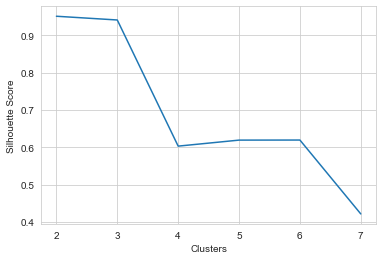

In [87]:
#Plot graph of cluster/silhouette score
sns.set_style('whitegrid')
plt.ylabel('Silhouette Score')
plt.xlabel('Clusters')
sns.lineplot(x=cluster_nums,y=scores)

In [88]:
kmeans = KMeans(3)
kmeans.fit(scaled_customers)

KMeans(n_clusters=3)

In [89]:
kmeans.cluster_centers_

array([[-4.31044124e-04, -1.16945403e-02, -3.12155902e-02,
        -3.13992603e-02, -2.97773865e-02, -2.46848546e-02,
        -1.11451936e-02,  1.42174581e-02, -1.50701050e-02,
        -2.47250920e-03, -3.25116018e-02,  2.50466157e-03],
       [ 1.73637008e-01,  7.31013960e+00,  1.94860129e+01,
         1.96079624e+01,  1.85923744e+01,  1.54101730e+01,
         7.00296290e+00, -4.99816459e-01,  1.05045720e+00,
         1.57298034e+00,  2.03016112e+01, -1.60817143e+00],
       [ 6.65617502e-01, -1.36003226e-01, -1.77254405e-01,
        -2.29364718e-01, -1.98106073e-01, -1.46505455e-01,
        -3.83115516e-01, -5.85462720e+01,  5.84127379e+01,
        -2.20832251e-01, -2.30648122e-01,  3.26856915e-01]])

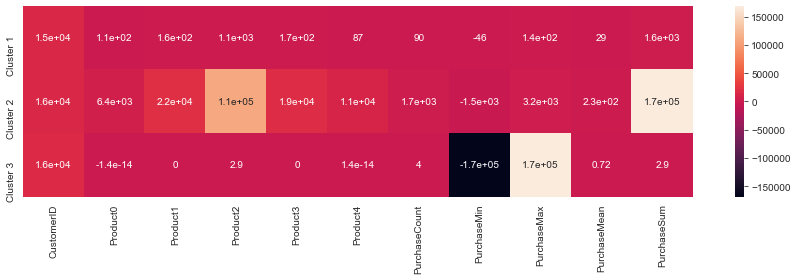

In [90]:
plt.figure(figsize=(15,3.5))
sns.heatmap(scaler.inverse_transform(kmeans.cluster_centers_)[:,0:11],annot=True,yticklabels=['Cluster 1','Cluster 2', 'Cluster 3'],xticklabels=scaled_customers.columns.drop('Foreign'))

# BUSINESS INSIGHTS

There are 3 customer segments
Customer segment 1 buys evenly across all categories but purchases most from Product category 1. They purchase on average 90 times and returns at most $28 of its purchases. The average purchase amount in this category is $29. this seems to be a category with a stable customer base which frequently purchases from the company. They represent a good target for promotional and referral offers.

Customer segment 2 purchases most from Product category 1 as well however they purchase more in quantity both in Product category one and all other categories. They purchase on average 1700 times and return at most $1500 of it's purchases. The average purchase amount in this group is $230. By looking into the most prominent vocabulary in each of the 5 product groups, we can get a feel for which product this customer segments buy more in which areas. They are the most frequent buyers and purchase items of the highest value and should be the primary focus for customer retention and marketing offers

Customer segment 3 purchases the least amount of product with a few in Product category 1. They purchase on average 3 times and return a staggering amount of $120000. They purchase the least amount on average and likely represent the smallest number of customers. They potentially are first time customers and attention should be paid on ways to better retain them.

Product Category 1 should also be emphasized more on the webpage since it's the category with the most purchases.

After segmenting customers, I am going build predictive models to try and predict the next time a customer is going to make a purchase. Having the ability to predict customers actions gives you the opportunity to give them personalised treatmemnt in a way they did not expect and can also help identify which customers are potentially going to churn. Knowing when next a customer will make a purchase also allows you to better allocate resources; Promotional offers can be targeted towards customers who will make a purchase very soon.

In [91]:
#import libraries
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.cluster import KMeans

In [92]:
#do not show warnings
import warnings
warnings.filterwarnings("ignore")

In [93]:
#import plotly for visualization
import chart_studio.plotly as py


In [94]:
#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [95]:
#import the csv
df_data = pd.read_csv('ecommerce_data.csv')

#print first 10 rows
df_data.head(10)

#convert date field from string to datetime
df_data['InvoiceDate'] = pd.to_datetime(df_data['InvoiceDate'])

#create dataframe with uk data only
df_uk = df_data.query("Country=='United Kingdom'").reset_index(drop=True)

In [96]:
df_6m = df_uk[(df_uk.InvoiceDate < '2011-09-01') & (df_uk.InvoiceDate >= '2011-03-01')].reset_index(drop=True)
df_next = df_uk[(df_uk.InvoiceDate >= '2011-09-01') & (df_uk.InvoiceDate < '2011-12-01')].reset_index(drop=True)

In [97]:
df_user = pd.DataFrame(df_6m['CustomerID'].unique())
df_user.columns = ['CustomerID']

In [98]:
#create a dataframe with customer id and first purchase date in tx_next
df_next_first_purchase = df_next.groupby('CustomerID').InvoiceDate.min().reset_index()
df_next_first_purchase.columns = ['CustomerID','MinPurchaseDate']

#create a dataframe with customer id and last purchase date in tx_6m
df_last_purchase = df_6m.groupby('CustomerID').InvoiceDate.max().reset_index()
df_last_purchase.columns = ['CustomerID','MaxPurchaseDate']

#merge two dataframes
df_purchase_dates = pd.merge(df_last_purchase,df_next_first_purchase,on='CustomerID',how='left')

#calculate the time difference in days:
df_purchase_dates['NextPurchaseDay'] = (df_purchase_dates['MinPurchaseDate'] - df_purchase_dates['MaxPurchaseDate']).dt.days

#merge with tx_user 
df_user = pd.merge(df_user, df_purchase_dates[['CustomerID','NextPurchaseDay']],on='CustomerID',how='left')

#print tx_user
df_user.head()

#fill NA values with 999
df_user = df_user.fillna(999)

In [99]:
df_user.head()

,CustomerID,NextPurchaseDay
0,14620.0,999.0
1,14740.0,999.0
2,13880.0,57.0
3,16462.0,111.0
4,17068.0,16.0


In [100]:
#create a dataframe with CustomerID and Invoice Date
df_day_order = df_6m[['CustomerID','InvoiceDate']]
#convert Invoice Datetime to day
df_day_order['InvoiceDay'] = df_6m['InvoiceDate'].dt.date
df_day_order = df_day_order.sort_values(['CustomerID','InvoiceDate'])
#drop duplicates
df_day_order = df_day_order.drop_duplicates(subset=['CustomerID','InvoiceDay'],keep='first')

In [101]:
#shifting last 3 purchase dates
df_day_order['PrevInvoiceDate'] = df_day_order.groupby('CustomerID')['InvoiceDay'].shift(1)
df_day_order['T2InvoiceDate'] = df_day_order.groupby('CustomerID')['InvoiceDay'].shift(2)
df_day_order['T3InvoiceDate'] = df_day_order.groupby('CustomerID')['InvoiceDay'].shift(3)

In [102]:
df_day_order.head()

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate
649,12747.0,2011-03-01 14:53:00,2011-03-01,NaN,NaN,NaN
65091,12747.0,2011-05-05 15:31:00,2011-05-05,2011-03-01,NaN,NaN
90473,12747.0,2011-05-25 09:57:00,2011-05-25,2011-05-05,2011-03-01,NaN
124699,12747.0,2011-06-28 10:06:00,2011-06-28,2011-05-25,2011-05-05,2011-03-01
184410,12747.0,2011-08-22 10:38:00,2011-08-22,2011-06-28,2011-05-25,2011-05-05


In [103]:
#Ctreate columns with the values of the difference between the last 3 purchases
df_day_order['DayDiff'] = (df_day_order['InvoiceDay'] - df_day_order['PrevInvoiceDate']).dt.days
df_day_order['DayDiff2'] = (df_day_order['InvoiceDay'] - df_day_order['T2InvoiceDate']).dt.days
df_day_order['DayDiff3'] = (df_day_order['InvoiceDay'] - df_day_order['T3InvoiceDate']).dt.days

In [104]:
df_day_order.head(5)

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate,DayDiff,DayDiff2,DayDiff3
649,12747.0,2011-03-01 14:53:00,2011-03-01,NaN,NaN,NaN,NaN,NaN,NaN
65091,12747.0,2011-05-05 15:31:00,2011-05-05,2011-03-01,NaN,NaN,65.0,NaN,NaN
90473,12747.0,2011-05-25 09:57:00,2011-05-25,2011-05-05,2011-03-01,NaN,20.0,85.0,NaN
124699,12747.0,2011-06-28 10:06:00,2011-06-28,2011-05-25,2011-05-05,2011-03-01,34.0,54.0,119.0
184410,12747.0,2011-08-22 10:38:00,2011-08-22,2011-06-28,2011-05-25,2011-05-05,55.0,89.0,109.0


In [105]:
#find out the mean and standard deviation of the difference between purchases in days for each customer ID
df_day_diff = df_day_order.groupby('CustomerID').agg({'DayDiff': ['mean','std']}).reset_index()
df_day_diff.columns = ['CustomerID', 'DayDiffMean','DayDiffStd']

In [106]:
#Drop all customers who have < 3 purchases
df_day_order_last = df_day_order.drop_duplicates(subset=['CustomerID'],keep='last')

In [107]:
df_day_order_last = df_day_order_last.dropna()
df_day_order_last = pd.merge(df_day_order_last, df_day_diff, on='CustomerID')
df_user = pd.merge(df_user, df_day_order_last[['CustomerID','DayDiff','DayDiff2','DayDiff3','DayDiffMean','DayDiffStd']], on='CustomerID')
#create df_class as a copy of df_user before applying get_dummies to convert categorical columns
df_class = df_user.copy()
df_class = pd.get_dummies(df_class)

In [108]:
df_class.head()

,CustomerID,NextPurchaseDay,DayDiff,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd
0,14740.0,999.0,6.0,34.0,92.0,30.666667,26.102363
1,13880.0,57.0,41.0,72.0,93.0,34.500000,10.754844
2,17068.0,16.0,25.0,37.0,38.0,17.300000,11.045864
3,12971.0,8.0,3.0,7.0,19.0,5.333333,3.619968
4,16915.0,83.0,41.0,121.0,156.0,52.000000,24.433583


In order to choose a model, I have to categorise our customers based on their purchase frequency. I am going to do this first looking at the 25,50 and 75th percentiles of Next purchase day for each customer and use this as a guide to form classes

In [109]:
df_user.NextPurchaseDay.describe()

count    623.000000
mean     176.390048
std      326.482713
min        0.000000
25%       24.500000
50%       47.000000
75%       87.000000
max      999.000000
Name: NextPurchaseDay, dtype: float64

Based on the percentiles above, 3 classes are formed namely; Customers who purchase in 0-20 days, customers who purchase in 21-49 days and customers in 50 days or more

In [110]:
#Categorise customers based on purchase frequency
df_class['NextPurchaseDayRange'] = 2
df_class.loc[df_class.NextPurchaseDay>20,'NextPurchaseDayRange'] = 1
df_class.loc[df_class.NextPurchaseDay>50,'NextPurchaseDayRange'] = 0

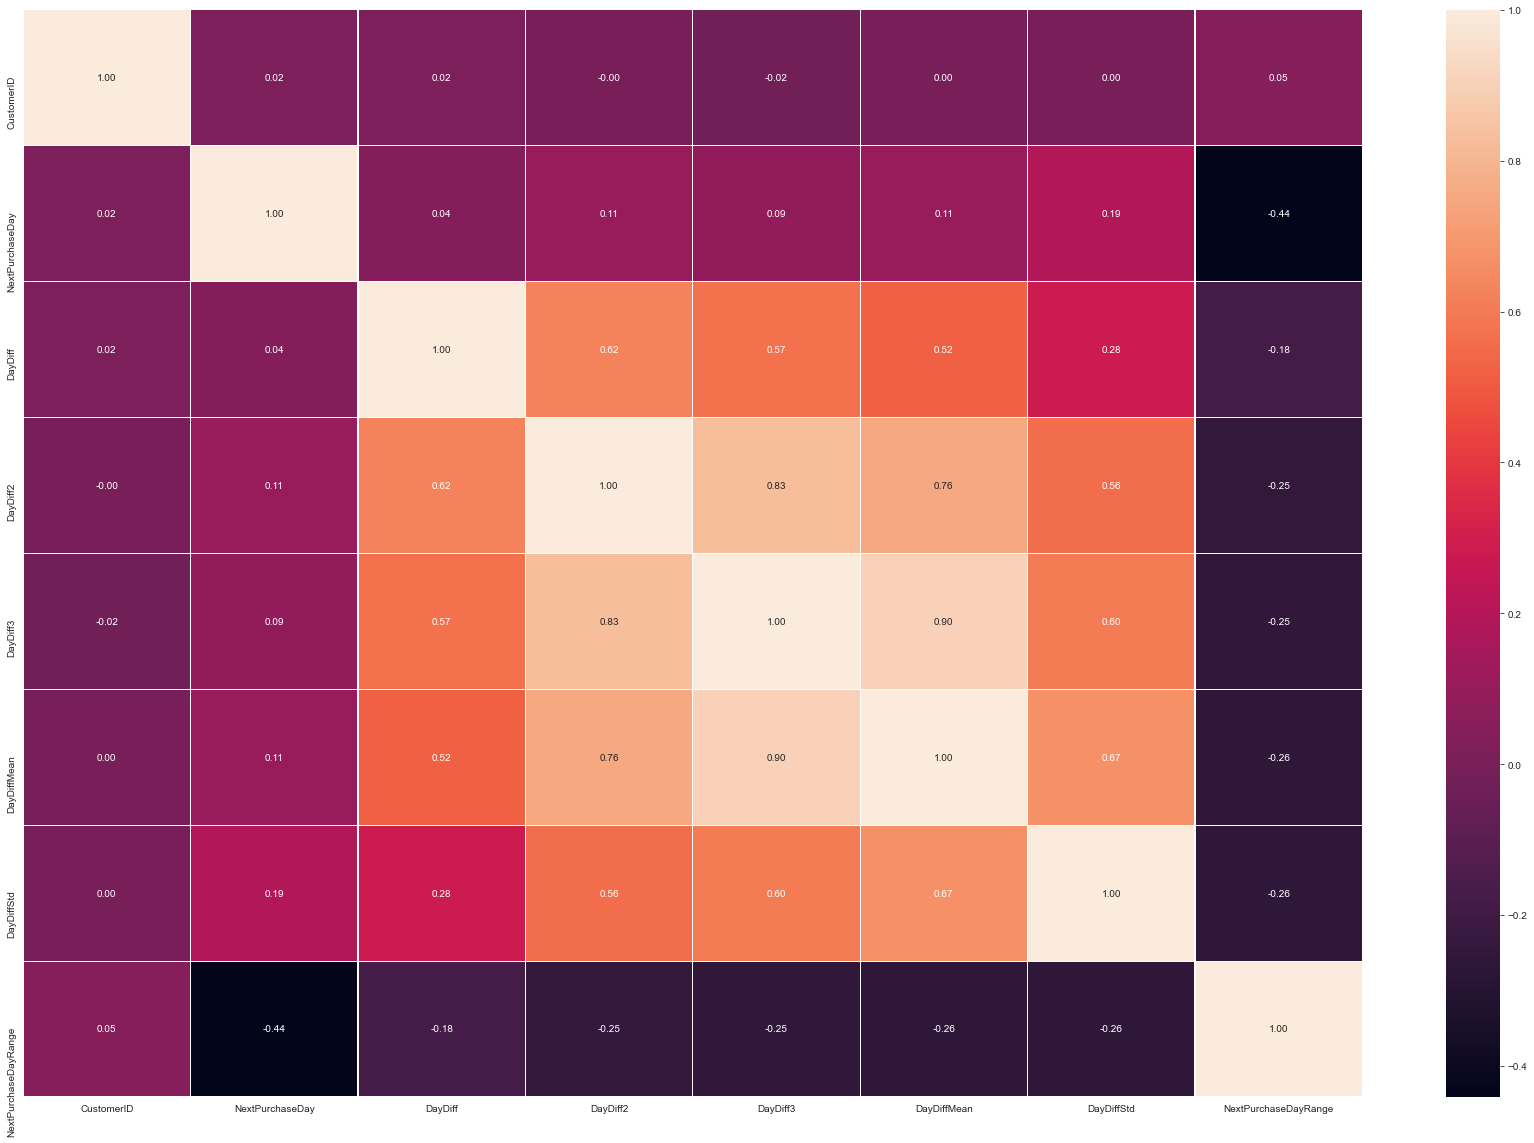

In [111]:
#Find correlation of variables
corr = df_class[df_class.columns].corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")

In [112]:
#train & test split
df_class = df_class.drop('NextPurchaseDay',axis=1)
X, y = df_class.drop('NextPurchaseDayRange',axis=1), df_class.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

#measure the accuracy 
for name,model in models:
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, cv_result)

LR [0.46184739 0.4939759 ]
NB [0.48995984 0.3253012 ]
RF [0.38955823 0.45381526]
SVC [0.4497992  0.54618474]
Dtree [0.33333333 0.31726908]
XGB [0.38554217 0.45783133]
KNN [0.37751004 0.42971888]


In [113]:
NB_model = GaussianNB().fit(X_train, y_train)
print('Accuracy of NB classifier on training set: {:.2f}'
       .format(NB_model.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
       .format(NB_model.score(X_test[X_train.columns], y_test)))

Accuracy of NB classifier on training set: 0.44
Accuracy of NB classifier on test set: 0.47


In [114]:
LR_model = LogisticRegression().fit(X_train, y_train)
print('Accuracy of LR classifier on training set: {:.2f}'
       .format(LR_model.score(X_train, y_train)))
print('Accuracy of LR classifier on test set: {:.2f}'
       .format(LR_model.score(X_test[X_train.columns], y_test)))

Accuracy of LR classifier on training set: 0.52
Accuracy of LR classifier on test set: 0.42


In [115]:
SVC_model = SVC().fit(X_train, y_train)
print('Accuracy of SVC classifier on training set: {:.2f}'
       .format(SVC_model.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'
       .format(SVC_model.score(X_test[X_train.columns], y_test)))

Accuracy of SVC classifier on training set: 0.50
Accuracy of SVC classifier on test set: 0.38


In [116]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.39


In [119]:
LR_model = LogisticRegression(max_iter = 200).fit(X_train, y_train)
print('Accuracy of LR classifier on training set: {:.2f}'
       .format(LR_model.score(X_train, y_train)))
print('Accuracy of LR classifier on test set: {:.2f}'
       .format(LR_model.score(X_test[X_train.columns], y_test)))

Accuracy of LR classifier on training set: 0.53
Accuracy of LR classifier on test set: 0.44


In [121]:
xgb_model = xgb.XGBClassifier(max_depth = 3, min_child_weight=5).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.95
Accuracy of XGB classifier on test set: 0.43


From model accuracy results, Naive Bayes, Logistic regression, SVC and XGB have the best accuracy in decreasing order. Hyper parameter tuning of the Logistic regression and XGboost increase it's accuracy by a few percentage points which is encouraging.